<a href="https://colab.research.google.com/github/boramkim0514/AI-Group-Project/blob/main/Global_COVID_19_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

프레임워크 구축

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

Load Data

In [4]:
df = pd.read_csv("/content/covid_19_clean_complete.csv")
df.head(30)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0.0,0.0,0.0,0.0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0.0,0.0,0.0,0.0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0.0,0.0,0.0,0.0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0.0,0.0,0.0,0.0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0.0,0.0,0.0,0.0,Africa
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0.0,0.0,0.0,0.0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0.0,0.0,0.0,0.0,Americas
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0.0,0.0,0.0,0.0,Europe
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0.0,0.0,0.0,0.0,Western Pacific
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0.0,0.0,0.0,0.0,Western Pacific


0. 가설 세우기
* 의료시설이 열악한 아프리카 지역의 코로나 사망자 비율이 가장 높을 것이다.

#1. 집계 목적
보고싶은 데이터 종류 확인
~ 별 통계 현항 집계 조회 및 시각화
 * 날짜별 
 * 나라별 
 * 지역별 

In [5]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
46814,NaN,Ecuador,-1.831200,-78.183400,2020-07-19,74013.0,5313.0,31901.0,36799.0,Americas
46815,NaN,Egypt,26.820553,30.802498,2020-07-19,87775.0,4302.0,28380.0,55093.0,Eastern Mediterranean
46816,NaN,El Salvador,13.794200,-88.896500,2020-07-19,11846.0,335.0,6705.0,4806.0,Americas
46817,NaN,Equatorial Guinea,1.650800,10.267900,2020-07-19,3071.0,51.0,842.0,2178.0,Africa
46818,NaN,Eritrea,15.179400,39.782300,NaN,NaN,NaN,NaN,NaN,NaN


#2. 데이터 살펴보기

### 2-1. NaN값 및 Data Type 확인

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46819 entries, 0 to 46818
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14015 non-null  object 
 1   Country/Region  46819 non-null  object 
 2   Lat             46819 non-null  float64
 3   Long            46819 non-null  float64
 4   Date            46818 non-null  object 
 5   Confirmed       46818 non-null  float64
 6   Deaths          46818 non-null  float64
 7   Recovered       46818 non-null  float64
 8   Active          46818 non-null  float64
 9   WHO Region      46818 non-null  object 
dtypes: float64(6), object(4)
memory usage: 3.6+ MB


In [ ]:
df.describe()

##  날짜 변환(datetime type)

In [42]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
46814   2020-07-19
46815   2020-07-19
46816   2020-07-19
46817   2020-07-19
46818          NaT
Name: Date, Length: 46819, dtype: datetime64[ns]

In [ ]:
df.info()

날짜 데이터  분리(연도/월)

In [48]:
df['DateYear'] = df['Date'].dt.year
df['DateMonth'] = df['Date'].dt.month

In [50]:
df['DateYear'].drop()

ValueError: ignored

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46819 entries, 0 to 46818
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14015 non-null  object        
 1   Country/Region  46819 non-null  object        
 2   Lat             46819 non-null  float64       
 3   Long            46819 non-null  float64       
 4   Date            46818 non-null  datetime64[ns]
 5   Confirmed       46818 non-null  float64       
 6   Deaths          46818 non-null  float64       
 7   Recovered       46818 non-null  float64       
 8   Active          46818 non-null  float64       
 9   WHO Region      46818 non-null  object        
 10  Year            46818 non-null  float64       
 11  Month           46818 non-null  float64       
 12  DateYear        46818 non-null  float64       
 13  DateMonth       46818 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory us

# 3. 데이터 전처리
 * NaN 값 처리(0, 평균값 채워주기)
 * 중복값(필요에 따라)
 * comma, 제거
 * 오차 범위 줄이기 위해


### 1 단계 
조건 별 데이터(행)의 index  가져온다



In [51]:
drop_idx = df.loc[df['Confirmed'] == 0].index
drop_idx

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            26882, 27143, 27404, 27665, 27926, 28187, 28448, 28709, 28970,
            29231],
           dtype='int64', length=10059)

### 2  단계 
drop 활용해 행 제거

###WHO 지역 구분 살펴보기

In [8]:
df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia', nan], dtype=object)

WHO 지역 기준으로 6개의 데이터셋으로 분류되어 있음을 알수 있다.

4. ~ 별 통계 현항 집계 조회 `groupby`
 * 날짜별 확진자/사망자 집계(총합계, 사망율)
 * 나라별 확진자/사망자 집계(총합계, 사망율)
 * 지역별 확진자/사망자 집계(총합계, 사망율)

###날짜  별 확진자/사망자 집계 조회

In [9]:
daily_confiemd = df.groupby("Date")['Confirmed'].sum() #날짜별 확진자 총합계
daily_confiemd #조회

Date
2020-01-22         555.0
2020-01-23         654.0
2020-01-24         941.0
2020-01-25        1434.0
2020-01-26        2118.0
                 ...    
2020-07-15    13559984.0
2020-07-16    13812525.0
2020-07-17    14054563.0
2020-07-18    14292198.0
2020-07-19     3889707.0
Name: Confirmed, Length: 180, dtype: float64

In [10]:
daily_deaths = df.groupby("Date")['Deaths'].sum()#날짜별 사망자 총합계
daily_deaths

Date
2020-01-22        17.0
2020-01-23        18.0
2020-01-24        26.0
2020-01-25        42.0
2020-01-26        56.0
                ...   
2020-07-15    583961.0
2020-07-16    589760.0
2020-07-17    596503.0
2020-07-18    602130.0
2020-07-19    143815.0
Name: Deaths, Length: 180, dtype: float64

###국가 별 확진자 집계 조회

In [11]:
country_c = df.groupby("Country/Region")["Confirmed"].sum()
country_c

Country/Region
Afghanistan           1649157.0
Albania                160567.0
Algeria                973177.0
Andorra                 87260.0
Angola                  15793.0
                        ...    
West Bank and Gaza     146137.0
Western Sahara            811.0
Yemen                   52312.0
Zambia                  95140.0
Zimbabwe                31546.0
Name: Confirmed, Length: 187, dtype: float64

###국가별 사망자 집계 조회

In [12]:
country_d = df.groupby("Country/Region")["Deaths"].sum()
country_d

Country/Region
Afghanistan           39325.0
Albania                4691.0
Algeria               68950.0
Andorra                5007.0
Angola                  798.0
                       ...   
West Bank and Gaza      749.0
Western Sahara           54.0
Yemen                 13535.0
Zambia                 1451.0
Zimbabwe                614.0
Name: Deaths, Length: 187, dtype: float64

# 피벗테이블 사용
    * 나라별 코로나 확진자의 사망자율/회복률을 지역별로 조회하기 위해 
    * 행 인덱스: 나라별
    * 열 인덱스: WHO 지역 #새로운 column 명이 됨
    * 집계할값 대상: 사망자 수

In [13]:
import numpy as np
pd.pivot_table(
    df, #사용할 데이터 프레임
    index="Country/Region",
    columns="WHO Region",
    values="Deaths")

WHO Region,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
Country/Region,,,,,,
Afghanistan,NaN,NaN,218.472222,NaN,NaN,NaN
Albania,NaN,NaN,NaN,26.061111,NaN,NaN
Algeria,383.055556,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,27.816667,NaN,NaN
Angola,4.433333,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,4.184358,NaN,NaN,NaN
Western Sahara,0.301676,NaN,NaN,NaN,NaN,NaN
Yemen,NaN,NaN,75.614525,NaN,NaN,NaN


In [14]:
df.loc[df['Confirmed']==0]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0.0,0.0,0.0,0.0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0.0,0.0,0.0,0.0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0.0,0.0,0.0,0.0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0.0,0.0,0.0,0.0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0.0,0.0,0.0,0.0,Africa
...,...,...,...,...,...,...,...,...,...,...
28187,NaN,Lesotho,-29.61000,28.233600,2020-05-08,0.0,0.0,0.0,0.0,Africa
28448,NaN,Lesotho,-29.61000,28.233600,2020-05-09,0.0,0.0,0.0,0.0,Africa
28709,NaN,Lesotho,-29.61000,28.233600,2020-05-10,0.0,0.0,0.0,0.0,Africa
28970,NaN,Lesotho,-29.61000,28.233600,2020-05-11,0.0,0.0,0.0,0.0,Africa


In [15]:
df.groupby(["Country/Region","WHO Region"])["Deaths"].sum()

Country/Region      WHO Region           
Afghanistan         Eastern Mediterranean    39325.0
Albania             Europe                    4691.0
Algeria             Africa                   68950.0
Andorra             Europe                    5007.0
Angola              Africa                     798.0
                                              ...   
West Bank and Gaza  Eastern Mediterranean      749.0
Western Sahara      Africa                      54.0
Yemen               Eastern Mediterranean    13535.0
Zambia              Africa                    1451.0
Zimbabwe            Africa                     614.0
Name: Deaths, Length: 187, dtype: float64

In [16]:
df.groupby(["WHO Region","Country/Region"])["Confirmed"].sum()

WHO Region       Country/Region
Africa           Algeria            973177.0
                 Angola              15793.0
                 Benin               50890.0
                 Botswana             9829.0
                 Burkina Faso        87540.0
                                     ...    
Western Pacific  Philippines       2301490.0
                 Singapore         3059779.0
                 South Korea       1521534.0
                 Taiwan*             51494.0
                 Vietnam             37004.0
Name: Confirmed, Length: 187, dtype: float64

In [17]:
df.groupby(["WHO Region","Country/Region"])["Deaths"].sum()

WHO Region       Country/Region
Africa           Algeria           68950.0
                 Angola              798.0
                 Benin               827.0
                 Botswana            110.0
                 Burkina Faso       5159.0
                                    ...   
Western Pacific  Philippines       94022.0
                 Singapore          2198.0
                 South Korea       30839.0
                 Taiwan*             777.0
                 Vietnam               0.0
Name: Deaths, Length: 187, dtype: float64

In [18]:
Region_Confirmed = df.groupby(["WHO Region"])["Confirmed"].sum()
Region_Confirmed

WHO Region
Africa                    15945192.0
Americas                 330824222.0
Eastern Mediterranean     61293706.0
Europe                   220227085.0
South-East Asia           40657151.0
Western Pacific           23973965.0
Name: Confirmed, dtype: float64

In [19]:
Region_Deaths = df.groupby(["WHO Region"])["Deaths"].sum()
Region_Deaths

WHO Region
Africa                     343624.0
Americas                 16525391.0
Eastern Mediterranean     1600863.0
Europe                   17398678.0
South-East Asia           1119300.0
Western Pacific            863957.0
Name: Deaths, dtype: float64

In [20]:
Country_Confirmed = df.groupby(['Country/Region'])['Confirmed'].sum()
Country_Confirmed

Country/Region
Afghanistan           1649157.0
Albania                160567.0
Algeria                973177.0
Andorra                 87260.0
Angola                  15793.0
                        ...    
West Bank and Gaza     146137.0
Western Sahara            811.0
Yemen                   52312.0
Zambia                  95140.0
Zimbabwe                31546.0
Name: Confirmed, Length: 187, dtype: float64

In [21]:
Country_Deaths = df.groupby(['Country/Region'])['Deaths'].sum()
Country_Deaths

Country/Region
Afghanistan           39325.0
Albania                4691.0
Algeria               68950.0
Andorra                5007.0
Angola                  798.0
                       ...   
West Bank and Gaza      749.0
Western Sahara           54.0
Yemen                 13535.0
Zambia                 1451.0
Zimbabwe                614.0
Name: Deaths, Length: 187, dtype: float64

# 가설 확인 
지역별 생존률 컬럼을 어떻게 추가하나?

In [22]:
# Survival_Rate = Regions_Deaths/Region_Confirmed
# Survival_Rate

In [23]:
import numpy as np
pd.pivot_table(
    df, #사용할 데이터 프레임
    index="Country/Region",
    columns="WHO Region",
    values="Deaths")

WHO Region,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
Country/Region,,,,,,
Afghanistan,NaN,NaN,218.472222,NaN,NaN,NaN
Albania,NaN,NaN,NaN,26.061111,NaN,NaN
Algeria,383.055556,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,27.816667,NaN,NaN
Angola,4.433333,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,4.184358,NaN,NaN,NaN
Western Sahara,0.301676,NaN,NaN,NaN,NaN,NaN
Yemen,NaN,NaN,75.614525,NaN,NaN,NaN


# Bar 그래프

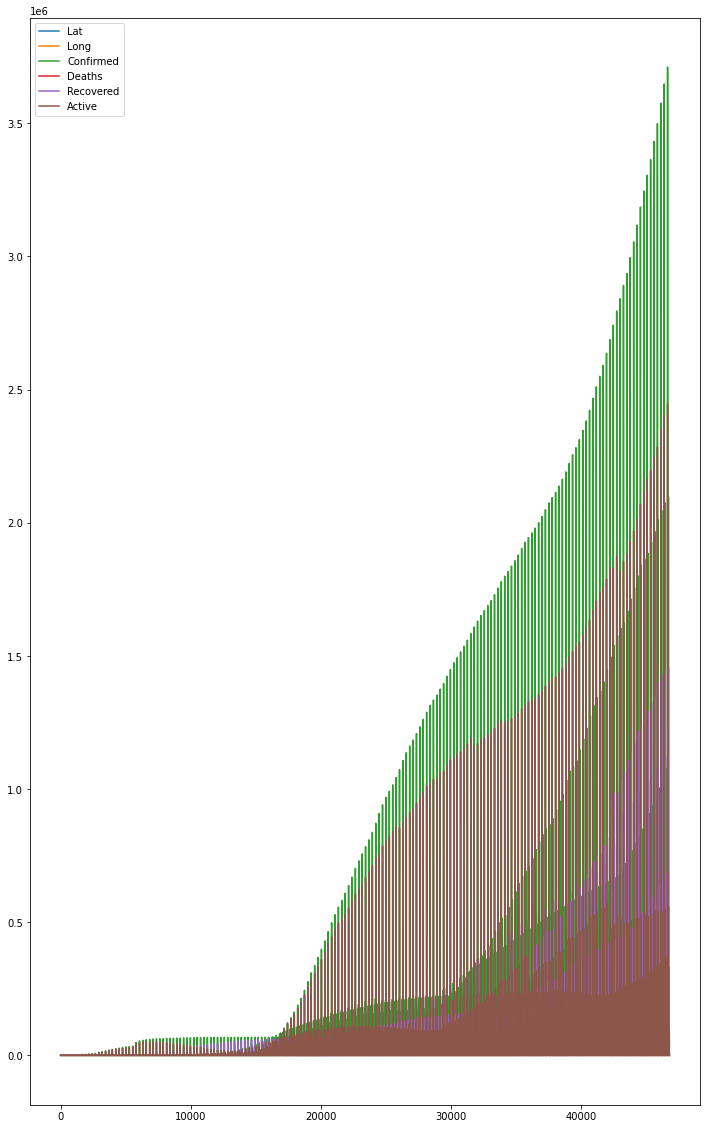

In [35]:
df.plot()
plt.rcParams["figure.figsize"] = (24, 20)

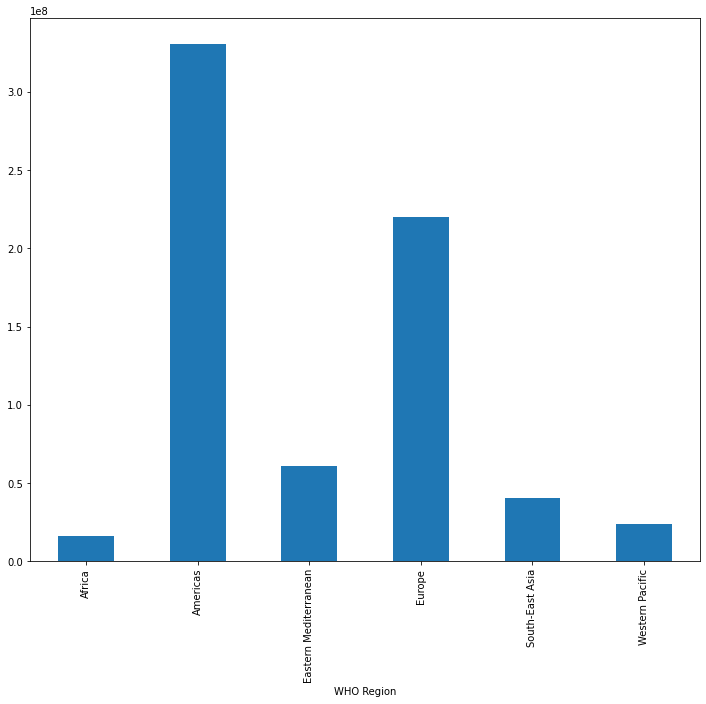

In [26]:
Region_Confirmed.plot(kind='bar')

In [27]:
df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia', nan], dtype=object)

In [28]:
df_Africa = df.loc[df['WHO Region'] == 'Africa']
df_Africa.head(100)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0.0,0.0,0.0,0.0,Africa
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0.0,0.0,0.0,0.0,Africa
24,NaN,Benin,9.3077,2.3158,2020-01-22,0.0,0.0,0.0,0.0,Africa
31,NaN,Burkina Faso,12.2383,-1.5616,2020-01-22,0.0,0.0,0.0,0.0,Africa
32,NaN,Cabo Verde,16.5388,-23.0418,2020-01-22,0.0,0.0,0.0,0.0,Africa
...,...,...,...,...,...,...,...,...,...,...
521,NaN,Lesotho,-29.6100,28.2336,2020-01-23,0.0,0.0,0.0,0.0,Africa
524,NaN,Algeria,28.0339,1.6596,2020-01-24,0.0,0.0,0.0,0.0,Africa
526,NaN,Angola,-11.2027,17.8739,2020-01-24,0.0,0.0,0.0,0.0,Africa
546,NaN,Benin,9.3077,2.3158,2020-01-24,0.0,0.0,0.0,0.0,Africa


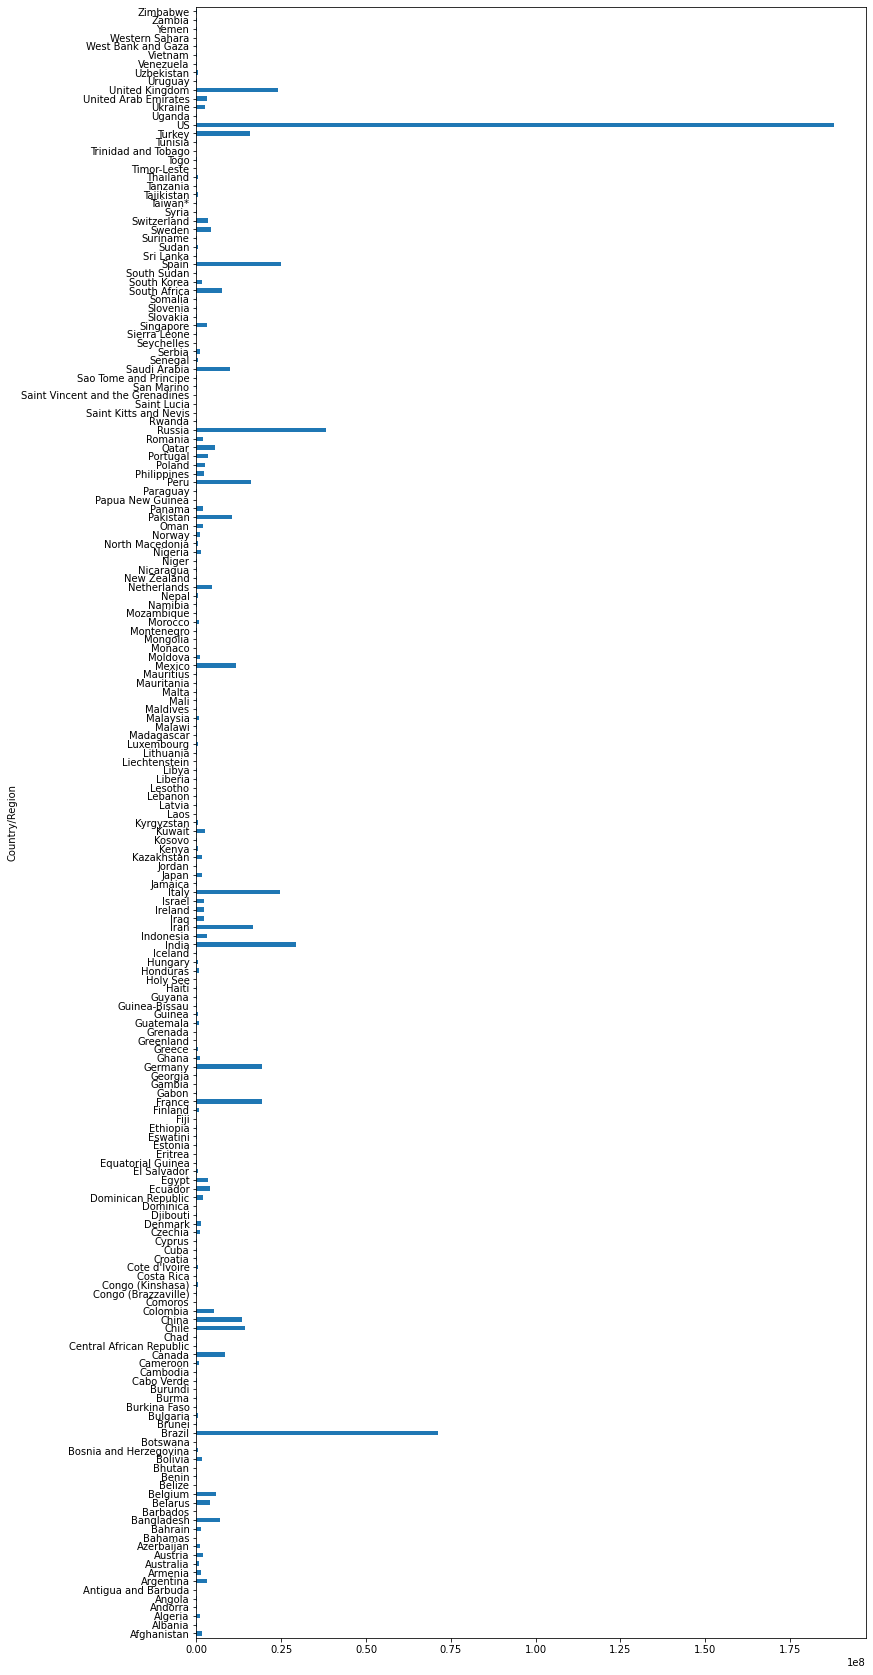

In [29]:
#그래프 크기 조절
plt.rcParams["figure.figsize"] = (12, 30)
Country_Confirmed.plot(kind='barh')

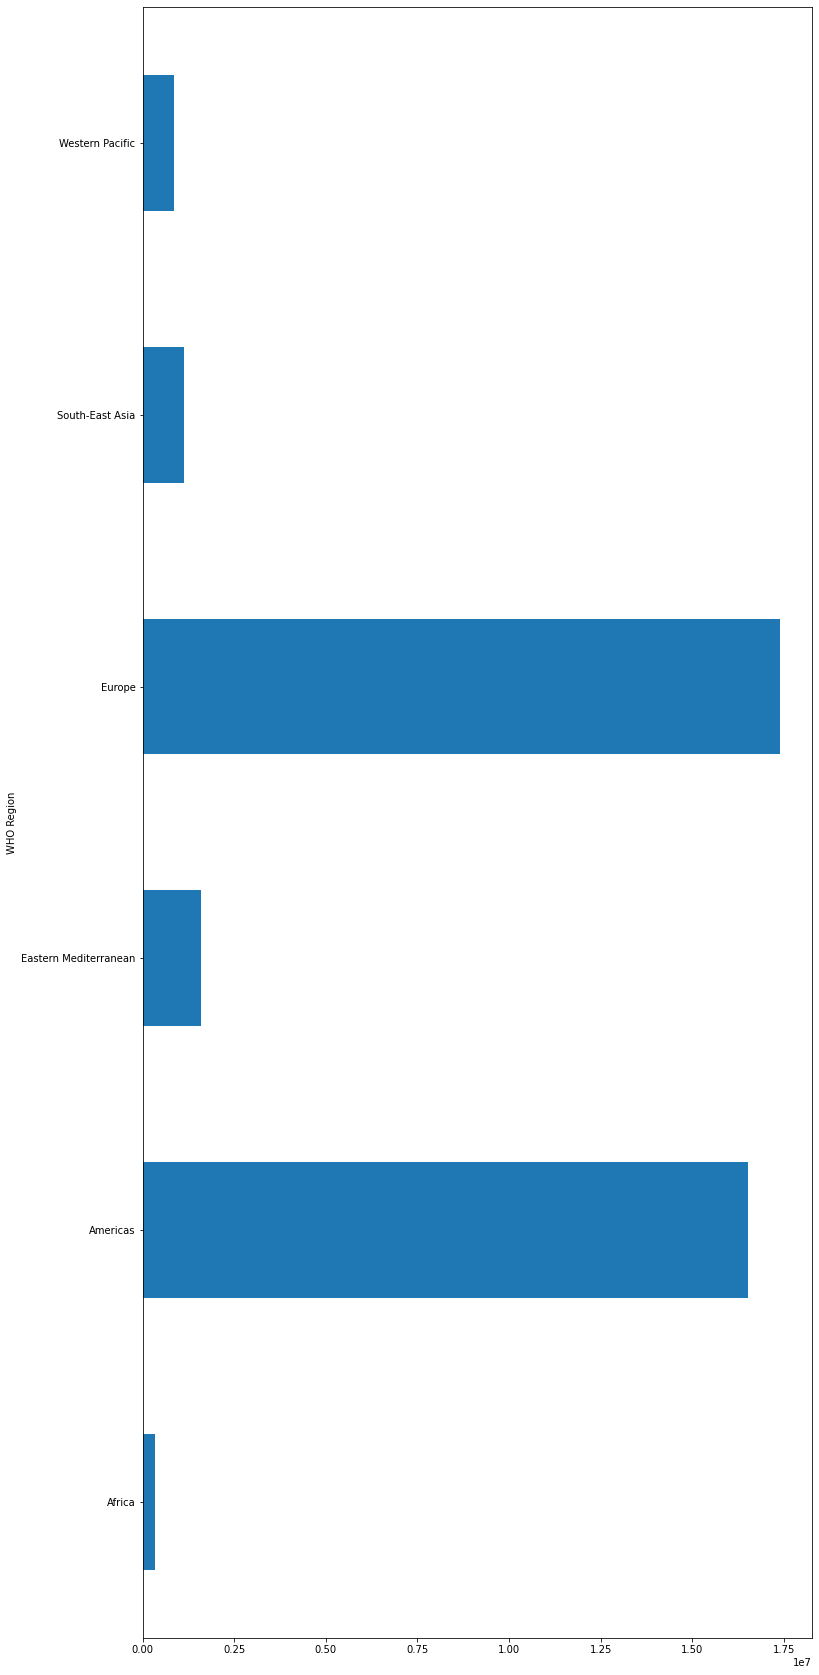

In [30]:
Region_Deaths.plot(kind='barh')

# 히스토그램

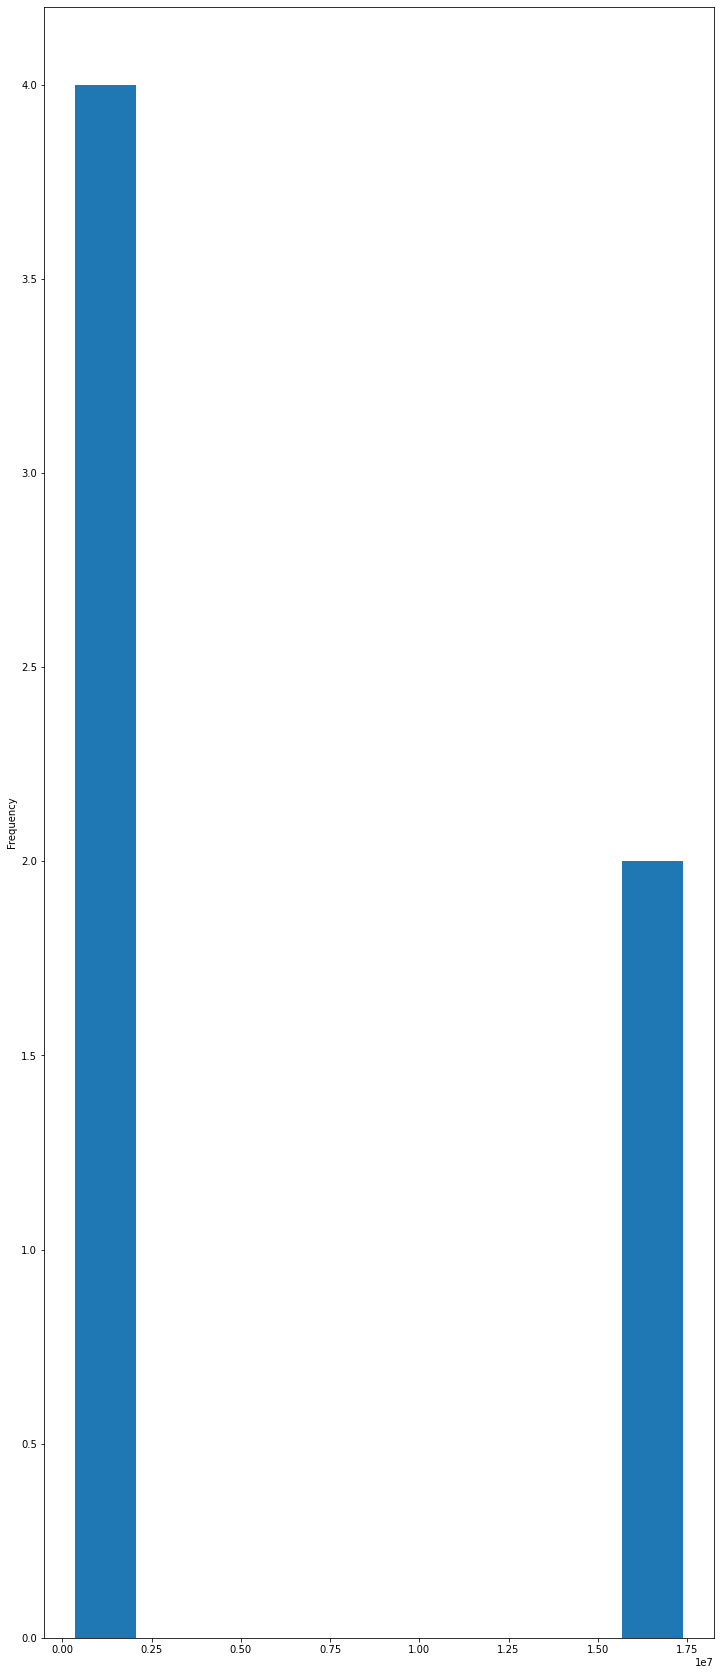

In [31]:
# WHO 지역별 데이터 빈도수
Region_Deaths.plot(kind='hist')

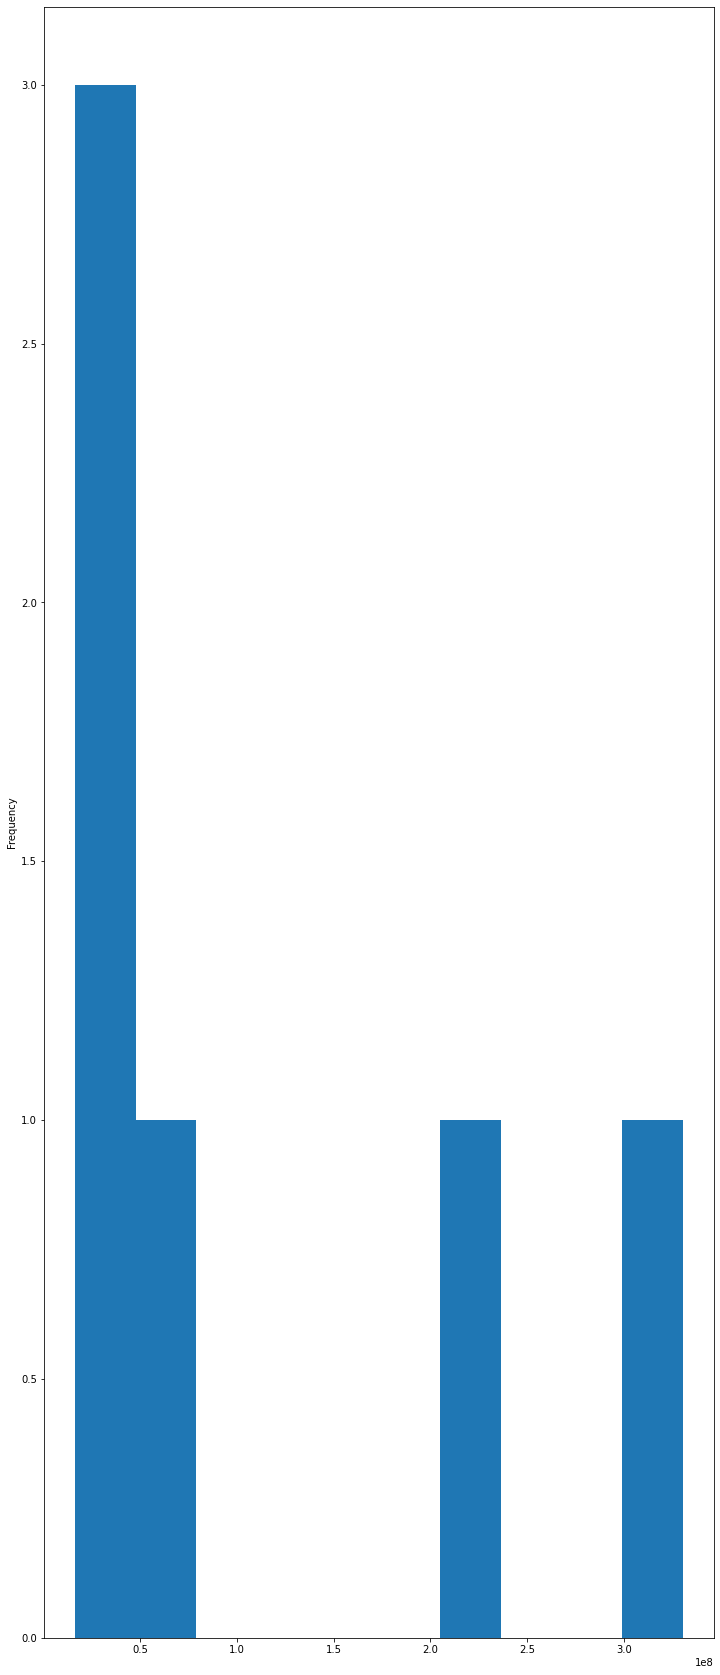

In [32]:
Region_Confirmed.plot(kind='hist')